**Classification of Work Visa Approval** (Ashish Lathkar)

Date: 02 March 2022

In [820]:
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [821]:
visa_data = pd.read_csv('/content/H-1B_Disclosure_Data_FY2019.csv', usecols=['CASE_NUMBER','CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR', 'TOTAL_WORKER_POSITIONS', 'FULL_TIME_POSITION', 'SECONDARY_ENTITY_1','SECONDARY_ENTITY_2','SECONDARY_ENTITY_3','SECONDARY_ENTITY_4', 'SECONDARY_ENTITY_5','SECONDARY_ENTITY_6', 'SECONDARY_ENTITY_7', 'SECONDARY_ENTITY_8', 'SECONDARY_ENTITY_9', 'SECONDARY_ENTITY_10', 'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_FROM_2', 'WAGE_RATE_OF_PAY_FROM_3', 'WAGE_RATE_OF_PAY_FROM_4', 'WAGE_RATE_OF_PAY_FROM_5', 'WAGE_RATE_OF_PAY_FROM_6', 'WAGE_RATE_OF_PAY_FROM_7', 'WAGE_RATE_OF_PAY_FROM_8', 'WAGE_RATE_OF_PAY_FROM_9', 'WAGE_RATE_OF_PAY_FROM_10', 'WAGE_UNIT_OF_PAY_1', 'WAGE_UNIT_OF_PAY_2', 'WAGE_UNIT_OF_PAY_2',  'WAGE_UNIT_OF_PAY_3', 'WAGE_UNIT_OF_PAY_4', 'WAGE_UNIT_OF_PAY_5', 'WAGE_UNIT_OF_PAY_6', 'WAGE_UNIT_OF_PAY_7', 'WAGE_UNIT_OF_PAY_8', 'WAGE_UNIT_OF_PAY_9', 'WAGE_UNIT_OF_PAY_10'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,14,31,45,53,66,76,87,97,108,129,150,160,171,192,213,223,234,244) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [822]:
visa_data

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,WAGE_UNIT_OF_PAY_8,SECONDARY_ENTITY_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_UNIT_OF_PAY_9,SECONDARY_ENTITY_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_UNIT_OF_PAY_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B
0,I-200-16092-327771,WITHDRAWN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN
1,I-203-17188-450729,WITHDRAWN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596341,I-200-19065-126907,CERTIFIED,H-1B,SENIOR EMBRYOLOGIST,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",Y,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN
596342,I-200-19070-793826,CERTIFIED,H-1B,ASSISTANT MOLECULAR SCIENTIST,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",Y,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN
596343,I-200-19066-751003,CERTIFIED,H-1B,RESEARCH SCIENTIST,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",Y,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN
596344,I-200-19066-561536,CERTIFIED,H-1B,RESEARCH ASSOCIATE,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",Y,1.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN


In [823]:
# Removing the E-3 Australian, H-1B1 Singapore, H-1B1 Chile rows from VISA_CLASS feature as we dont need them

visa_data.drop(visa_data[visa_data['VISA_CLASS']=='E-3 Australian'].index, inplace=True)
visa_data.drop(visa_data[visa_data['VISA_CLASS']=='H-1B1 Singapore'].index, inplace=True)
visa_data.drop(visa_data[visa_data['VISA_CLASS']=='H-1B1 Chile'].index, inplace=True)

# Dropping the null value rows from VISA_CLASS features

visa_data.drop(visa_data[visa_data['VISA_CLASS'].isnull()].index, inplace=True)

In [824]:
# Dropping the WITHDRAWN and CERTIFIED-WITHDRAWN rows from CASE_STATUS as we dont need them and Encoding the CERTIFIED as 1 & DENIED as 0

visa_data.drop(visa_data[visa_data['CASE_STATUS']=='WITHDRAWN'].index, inplace=True)
visa_data.drop(visa_data[visa_data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index, inplace=True)
visa_data['CASE_STATUS'].replace({'CERTIFIED':1, 'DENIED':0}, inplace=True)

Handling the data or Pre - Processing the data for every particular feature

In [825]:
# Checking the format of CASE_NUMBER entries
visa_data[visa_data['CASE_NUMBER'].str.match("I-[0-9][0-9][0-9]-[0-9][0-9][0-9][0-9][0-9]-[0-9][0-9][0-9][0-9][0-9][0-9]")==False].index 

# Checking the format of SOC_CODE entries
visa_data[visa_data['SOC_CODE'].str.match("[0-9][0-9]-[0-9][0-9][0-9][0-9]")==False].index 
#visa_data.at[664611, 'SOC_CODE'], visa_data.at[664611, 'SOC_TITLE'] = visa_data.at[664611, 'SOC_TITLE'], visa_data.at[664611, 'SOC_CODE'] #Resolved it

Int64Index([], dtype='int64')

In [826]:
# Pushing SOC_CODE and SOC_TITLE to those who dont have any 

visa_data.at[664612, 'SOC_CODE'], visa_data.at[664612, 'SOC_TITLE']='15-1132', 'SOFTWARE DEVELOPERS, APPLICATIONS'
visa_data.at[664614, 'SOC_CODE'], visa_data.at[664614, 'SOC_TITLE']='15-1132', 'SOFTWARE DEVELOPERS, APPLICATIONS'

visa_data.at[664613, 'SOC_CODE'], visa_data.at[664613, 'SOC_TITLE']='15-1121', 'COMPUTER SYSTEMS ANALYSTS'
visa_data.at[664615, 'SOC_CODE'], visa_data.at[664615, 'SOC_TITLE']='15-1121', 'COMPUTER SYSTEMS ANALYSTS'

In [827]:
# Checking null values in 'FULL_TIME_POSITION' column

visa_data[visa_data['FULL_TIME_POSITION'].str.match("Y|N")==False].index

Int64Index([], dtype='int64')

In [828]:
# Checking null values in 'NEW_CONCURRENT_EMPLOYMENT' column

visa_data[visa_data['NEW_CONCURRENT_EMPLOYMENT'].isnull()].index 
visa_data.drop(307174, inplace=True) # resolved it
visa_data.drop(664612, inplace=True)
visa_data.drop(664613, inplace=True)
visa_data.drop(664614, inplace=True)
visa_data.drop(664615, inplace=True)

In [829]:
# Checking null values in ''CHANGE_EMPLOYER'' column

visa_data[visa_data['CHANGE_EMPLOYER'].isnull()].index 

# Checking null values in 'AMENDED_PETITION' column

visa_data[visa_data['AMENDED_PETITION'].isnull()].index 

# Checking null values in 'EMPLOYER_NAME' column

visa_data[visa_data['EMPLOYER_NAME'].isnull()].index 
visa_data.drop(visa_data[visa_data['EMPLOYER_NAME'].isnull()].index, inplace=True)

In [830]:
# Checking null values in 'NAICS_CODE' column

visa_data[visa_data['NAICS_CODE'].isnull()].index 
visa_data.at[12712, 'NAICS_CODE'] = 522110.0 

In [831]:
visa_data['NAICS_CODE'].mean()

444241.191482155

In [832]:
# Checking null values in 'AGENT_REPRESENTING_EMPLOYER' column

visa_data[visa_data['AGENT_REPRESENTING_EMPLOYER'].isnull()].index 
visa_data.drop(visa_data[visa_data['AGENT_REPRESENTING_EMPLOYER'].isnull()].index, inplace=True) 

In [833]:
# Converted cell values from string to float  in "CONTINUED_EMPLOYMENT" column

visa_data["CONTINUED_EMPLOYMENT"] = visa_data["CONTINUED_EMPLOYMENT"].astype(float, copy=True, errors='ignore')

In [834]:
# Secondary_entity will be 'Y', if the 'WAGE_RATE_OF_PAY_FROM' and 'WAGE_UNIT_OF_PAY' is not null.

visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_1'].notnull()) & (visa_data['SECONDARY_ENTITY_1'].isnull()), "SECONDARY_ENTITY_1"] = "Y"
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_2'].notnull()) & (visa_data['SECONDARY_ENTITY_2'].isnull()), "SECONDARY_ENTITY_2"] = "Y"
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_3'].notnull()) & (visa_data['SECONDARY_ENTITY_3'].isnull()), "SECONDARY_ENTITY_3"] = "Y"
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_4'].notnull()) & (visa_data['SECONDARY_ENTITY_4'].isnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_5'].notnull()) & (visa_data['SECONDARY_ENTITY_5'].isnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_7'].notnull()) & (visa_data['SECONDARY_ENTITY_7'].isnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_8'].notnull()) & (visa_data['SECONDARY_ENTITY_8'].isnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_9'].notnull()) & (visa_data['SECONDARY_ENTITY_9'].isnull())]
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_10'].notnull()) & (visa_data['SECONDARY_ENTITY_10'].isnull())] 

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,WAGE_UNIT_OF_PAY_8,SECONDARY_ENTITY_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_UNIT_OF_PAY_9,SECONDARY_ENTITY_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_UNIT_OF_PAY_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B


In [835]:
# Removing null values of 'SECONDARY_ENTITY_1'

S1= (visa_data['SECONDARY_ENTITY_1'].isnull()) & (visa_data['SECONDARY_ENTITY_2'].isnull()) &(visa_data['SECONDARY_ENTITY_3'].isnull()) &(visa_data['SECONDARY_ENTITY_4'].isnull()) &(visa_data['SECONDARY_ENTITY_5'].isnull()) &(visa_data['SECONDARY_ENTITY_6'].isnull()) &(visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_1']).isnull() & (visa_data['WAGE_UNIT_OF_PAY_2']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_3']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_4']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_5']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_6']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() & (visa_data['WAGE_RATE_OF_PAY_FROM_1']).isnull()& (visa_data['WAGE_RATE_OF_PAY_FROM_2']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_3']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_4']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_5']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_6']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S1, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S1, 'SECONDARY_ENTITY_10']='N'



visa_data['SECONDARY_ENTITY_1'].isnull().sum()

0

In [836]:
# Removing null values of 'SECONDARY_ENTITY_2'

S2 = (visa_data['SECONDARY_ENTITY_2'].isnull()) &(visa_data['SECONDARY_ENTITY_3'].isnull()) &(visa_data['SECONDARY_ENTITY_4'].isnull()) &(visa_data['SECONDARY_ENTITY_5'].isnull()) &(visa_data['SECONDARY_ENTITY_6'].isnull()) &(visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull())  & (visa_data['WAGE_UNIT_OF_PAY_2']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_3']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_4']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_5']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_6']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() &  (visa_data['WAGE_RATE_OF_PAY_FROM_2']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_3']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_4']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_5']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_6']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S2, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S2, 'SECONDARY_ENTITY_10']='N'

visa_data['SECONDARY_ENTITY_2'].isnull().sum()

0

In [837]:
# Removing null values of 'SECONDARY_ENTITY_3'

S3 = (visa_data['SECONDARY_ENTITY_3'].isnull()) &(visa_data['SECONDARY_ENTITY_4'].isnull()) &(visa_data['SECONDARY_ENTITY_5'].isnull()) &(visa_data['SECONDARY_ENTITY_6'].isnull()) &(visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull())  & (visa_data['WAGE_UNIT_OF_PAY_3']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_4']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_5']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_6']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() &  (visa_data['WAGE_RATE_OF_PAY_FROM_3']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_4']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_5']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_6']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()


visa_data.loc[S3, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S3, 'SECONDARY_ENTITY_10']='N'

visa_data['SECONDARY_ENTITY_3'].isnull().sum()

0

In [838]:
# Removing null values of 'SECONDARY_ENTITY_4'

S4 = (visa_data['SECONDARY_ENTITY_4'].isnull()) &(visa_data['SECONDARY_ENTITY_5'].isnull()) &(visa_data['SECONDARY_ENTITY_6'].isnull()) &(visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull()) &(visa_data['WAGE_UNIT_OF_PAY_4']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_5']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_6']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull()  &(visa_data['WAGE_RATE_OF_PAY_FROM_4']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_5']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_6']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S4, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S4, 'SECONDARY_ENTITY_10']='N'

visa_data['SECONDARY_ENTITY_4'].isnull().sum()

0

In [839]:
# Removing null values of 'SECONDARY_ENTITY_5'

S5 = (visa_data['SECONDARY_ENTITY_5'].isnull()) &(visa_data['SECONDARY_ENTITY_6'].isnull()) &(visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull())  &(visa_data['WAGE_UNIT_OF_PAY_5']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_6']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull()  &(visa_data['WAGE_RATE_OF_PAY_FROM_5']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_6']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S5, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S5, 'SECONDARY_ENTITY_10']='N'

visa_data['SECONDARY_ENTITY_5'].isnull().sum()

0

In [840]:
# Removing null values of 'SECONDARY_ENTITY_6'

S6 = (visa_data['SECONDARY_ENTITY_6'].isnull()) &(visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull())  &(visa_data['WAGE_UNIT_OF_PAY_6']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_6']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S6, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S6, 'SECONDARY_ENTITY_10']='N'

visa_data['SECONDARY_ENTITY_6'].isnull().sum()

0

In [841]:
# Removing null values of 'SECONDARY_ENTITY_7'

S7 = (visa_data['SECONDARY_ENTITY_7'].isnull()) &(visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull()) &(visa_data['WAGE_UNIT_OF_PAY_7']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_7']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S7, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S7, 'SECONDARY_ENTITY_10']='N'


visa_data['SECONDARY_ENTITY_7'].isnull().sum()

0

In [842]:
# Removing null values of 'SECONDARY_ENTITY_8'

S8 = (visa_data['SECONDARY_ENTITY_8'].isnull()) &(visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull())  &(visa_data['WAGE_UNIT_OF_PAY_8']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_8']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S8, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S8, 'SECONDARY_ENTITY_10']='N'


visa_data['SECONDARY_ENTITY_8'].isnull().sum()

0

In [843]:
# Removing null values of 'SECONDARY_ENTITY_9'

S9 = (visa_data['SECONDARY_ENTITY_9'].isnull()) &(visa_data['SECONDARY_ENTITY_10'].isnull())  &(visa_data['WAGE_UNIT_OF_PAY_9']).isnull() &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_9']).isnull() &(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S9, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S9, 'SECONDARY_ENTITY_10']='N'

visa_data['SECONDARY_ENTITY_9'].isnull().sum()

0

In [844]:
# Removing null values of 'SECONDARY_ENTITY_10'
S10 = (visa_data['SECONDARY_ENTITY_10'].isnull()) &(visa_data['WAGE_UNIT_OF_PAY_10']).isnull()&(visa_data['WAGE_RATE_OF_PAY_FROM_10']).isnull()

visa_data.loc[S10, 'SECONDARY_ENTITY_1']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_2']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_3']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_4']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_5']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_6']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_7']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_8']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_9']='N'
visa_data.loc[S10, 'SECONDARY_ENTITY_10']='N'


visa_data['SECONDARY_ENTITY_10'].isnull().sum()

0

In [845]:
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_1'].notnull()) & (visa_data['SECONDARY_ENTITY_1']=='N'), 'SECONDARY_ENTITY_1']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_2'].notnull()) & (visa_data['SECONDARY_ENTITY_2']=='N'), 'SECONDARY_ENTITY_2']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_3'].notnull()) & (visa_data['SECONDARY_ENTITY_3']=='N'), 'SECONDARY_ENTITY_3']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_4'].notnull()) & (visa_data['SECONDARY_ENTITY_4']=='N'), 'SECONDARY_ENTITY_4']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_6'].notnull()) & (visa_data['SECONDARY_ENTITY_6']=='N'), 'SECONDARY_ENTITY_6']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_7'].notnull()) & (visa_data['SECONDARY_ENTITY_7']=='N'), 'SECONDARY_ENTITY_7']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_8'].notnull()) & (visa_data['SECONDARY_ENTITY_8']=='N'), 'SECONDARY_ENTITY_8']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_9'].notnull()) & (visa_data['SECONDARY_ENTITY_9']=='N'), 'SECONDARY_ENTITY_9']='Y'
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_10'].notnull()) & (visa_data['SECONDARY_ENTITY_10']=='N'), 'SECONDARY_ENTITY_10']='Y'

In [846]:
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_1'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_1'].isnull())]
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_2'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_2'].isnull())]
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_3'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_3'].isnull())]

visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_4'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_4'].isnull())] # found 
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_4'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_4'].isnull()), 'WAGE_UNIT_OF_PAY_4']='Year'

visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_5'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_5'].isnull())] # found 
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_5'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_5'].isnull()), 'WAGE_UNIT_OF_PAY_5']='Year'

visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_6'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_6'].isnull())]

visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_7'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_7'].isnull())] # found 
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_7'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_7'].isnull()), 'WAGE_UNIT_OF_PAY_7']='Year'

visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_8'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_8'].isnull())] # found
visa_data.loc[(visa_data['WAGE_RATE_OF_PAY_FROM_8'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_8'].isnull()), 'WAGE_UNIT_OF_PAY_8']='Year'

visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_9'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_9'].isnull())]
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_10'].notnull()) & (visa_data['WAGE_UNIT_OF_PAY_10'].isnull())]

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,WAGE_UNIT_OF_PAY_8,SECONDARY_ENTITY_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_UNIT_OF_PAY_9,SECONDARY_ENTITY_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_UNIT_OF_PAY_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B


In [847]:
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_1'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_1'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_2'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_2'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_3'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_3'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_4'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_4'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_5'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_5'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_6'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_6'].notnull())]
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_7'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_7'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_8'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_8'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_9'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_9'].notnull())] 
visa_data[(visa_data['WAGE_RATE_OF_PAY_FROM_10'].isnull()) & (visa_data['WAGE_UNIT_OF_PAY_10'].notnull())] 

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,WAGE_UNIT_OF_PAY_8,SECONDARY_ENTITY_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_UNIT_OF_PAY_9,SECONDARY_ENTITY_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_UNIT_OF_PAY_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B


In [848]:
# Removing the dollar and comma sign from the WAGE_RATE_OF_PAY_FROM features and Converting it into float 

visa_data['WAGE_RATE_OF_PAY_FROM_1']=visa_data['WAGE_RATE_OF_PAY_FROM_1'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_1']=visa_data['WAGE_RATE_OF_PAY_FROM_1'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_2']=visa_data['WAGE_RATE_OF_PAY_FROM_2'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_2']=visa_data['WAGE_RATE_OF_PAY_FROM_2'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_3']=visa_data['WAGE_RATE_OF_PAY_FROM_3'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_3']=visa_data['WAGE_RATE_OF_PAY_FROM_3'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_4']=visa_data['WAGE_RATE_OF_PAY_FROM_4'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_4']=visa_data['WAGE_RATE_OF_PAY_FROM_4'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_5']=visa_data['WAGE_RATE_OF_PAY_FROM_5'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_5']=visa_data['WAGE_RATE_OF_PAY_FROM_5'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_6']=visa_data['WAGE_RATE_OF_PAY_FROM_6'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_6']=visa_data['WAGE_RATE_OF_PAY_FROM_6'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_7']=visa_data['WAGE_RATE_OF_PAY_FROM_7'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_7']=visa_data['WAGE_RATE_OF_PAY_FROM_7'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_8']=visa_data['WAGE_RATE_OF_PAY_FROM_8'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_8']=visa_data['WAGE_RATE_OF_PAY_FROM_8'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_9']=visa_data['WAGE_RATE_OF_PAY_FROM_9'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_9']=visa_data['WAGE_RATE_OF_PAY_FROM_9'].astype(float)

visa_data['WAGE_RATE_OF_PAY_FROM_10']=visa_data['WAGE_RATE_OF_PAY_FROM_10'].replace({'\$': '', ',': ''}, regex=True)
visa_data['WAGE_RATE_OF_PAY_FROM_10']=visa_data['WAGE_RATE_OF_PAY_FROM_10'].astype(float)

In [849]:
# Checking null values in the 'H-1B_DEPENDENT' column 

visa_data['H-1B_DEPENDENT'].isnull().sum() 
visa_data.drop(visa_data[visa_data['H-1B_DEPENDENT'].isnull()].index, inplace=True)
visa_data.drop(231476, inplace=True)

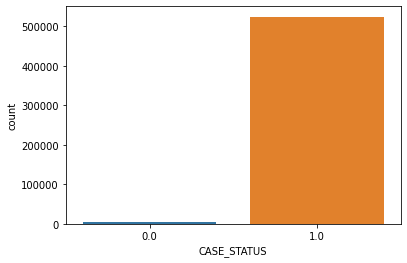

In [850]:
# Analyzing the CASE_STATUS feature

sns.countplot(x='CASE_STATUS', data=visa_data)

Data Encoding

In [851]:
# A separate dataframe 'testing' is created
# dummies were added in the place of string values

visa_data['FULL_TIME_POSITION'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['H-1B_DEPENDENT'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['WILLFUL_VIOLATOR'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['AGENT_REPRESENTING_EMPLOYER'].replace({'Y':1, 'N':0}, inplace=True)

visa_data['SECONDARY_ENTITY_1'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_2'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_3'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_4'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_5'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_6'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_7'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_8'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_9'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['SECONDARY_ENTITY_10'].replace({'Y':1, 'N':0}, inplace=True)

visa_data['WAGE_UNIT_OF_PAY_1'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_2'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_3'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_4'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_5'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_6'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_7'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_8'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_9'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)
visa_data['WAGE_UNIT_OF_PAY_10'].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)

le = LabelEncoder()
visa_data.JOB_TITLE = le.fit_transform(visa_data.JOB_TITLE)
visa_data.EMPLOYER_NAME = le.fit_transform(visa_data.EMPLOYER_NAME)
visa_data.SOC_CODE = le.fit_transform(visa_data.SOC_CODE)
visa_data.SOC_TITLE = le.fit_transform(visa_data.SOC_TITLE)
visa_data.NAICS_CODE = le.fit_transform(visa_data.NAICS_CODE)
visa_data.SUPPORT_H1B = le.fit_transform(visa_data.SUPPORT_H1B)

testing = visa_data.copy(deep=True)
sum_secondary_entity = testing['SECONDARY_ENTITY_1'] + testing['SECONDARY_ENTITY_2'] + testing['SECONDARY_ENTITY_3'] + testing['SECONDARY_ENTITY_4'] + testing['SECONDARY_ENTITY_5'] + testing['SECONDARY_ENTITY_6'] + testing['SECONDARY_ENTITY_7'] + testing['SECONDARY_ENTITY_8'] + testing['SECONDARY_ENTITY_9'] + testing['SECONDARY_ENTITY_10']

testing['SUM_SECONDARY_ENTITY'] = sum_secondary_entity

Dealing Outliers

In [852]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [853]:
lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_1'])
testing['WAGE_RATE_OF_PAY_FROM_1'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_1']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_1'])
testing['WAGE_RATE_OF_PAY_FROM_1'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_1']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_1'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_2'])
testing['WAGE_RATE_OF_PAY_FROM_2'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_2']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_2'])
testing['WAGE_RATE_OF_PAY_FROM_2'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_2']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_2'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_3'])
testing['WAGE_RATE_OF_PAY_FROM_3'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_3']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_3'])
testing['WAGE_RATE_OF_PAY_FROM_3'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_3']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_3'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_3'])
testing['WAGE_RATE_OF_PAY_FROM_3'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_3']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_3'])
testing['WAGE_RATE_OF_PAY_FROM_3'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_3']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_3'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_4'])
testing['WAGE_RATE_OF_PAY_FROM_4'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_4']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_4'])
testing['WAGE_RATE_OF_PAY_FROM_4'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_4']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_4'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_5'])
testing['WAGE_RATE_OF_PAY_FROM_5'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_5']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_5'])
testing['WAGE_RATE_OF_PAY_FROM_5'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_5']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_5'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_6'])
testing['WAGE_RATE_OF_PAY_FROM_6'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_6']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_6'])
testing['WAGE_RATE_OF_PAY_FROM_6'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_6']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_6'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_7'])
testing['WAGE_RATE_OF_PAY_FROM_7'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_7']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_7'])
testing['WAGE_RATE_OF_PAY_FROM_7'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_7']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_7'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_8'])
testing['WAGE_RATE_OF_PAY_FROM_8'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_8']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_8'])
testing['WAGE_RATE_OF_PAY_FROM_8'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_8']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_8'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_9'])
testing['WAGE_RATE_OF_PAY_FROM_9'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_9']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_9'])
testing['WAGE_RATE_OF_PAY_FROM_9'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_9']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_9'])

lowincome, uppincome = remove_outlier(testing['WAGE_RATE_OF_PAY_FROM_10'])
testing['WAGE_RATE_OF_PAY_FROM_10'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_10']>uppincome, uppincome, testing['WAGE_RATE_OF_PAY_FROM_10'])
testing['WAGE_RATE_OF_PAY_FROM_10'] = np.where(testing['WAGE_RATE_OF_PAY_FROM_10']<lowincome, lowincome, testing['WAGE_RATE_OF_PAY_FROM_10'])

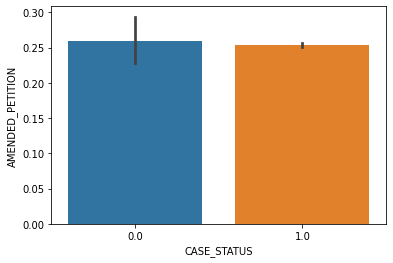

In [854]:
sns.barplot(x='CASE_STATUS', y='AMENDED_PETITION', data=testing)

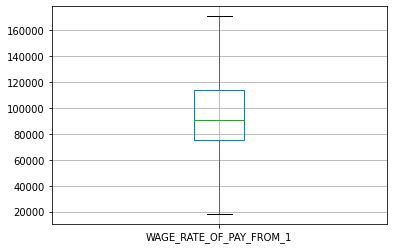

In [855]:
testing.boxplot('WAGE_RATE_OF_PAY_FROM_1')

In [856]:
testing

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,SECONDARY_ENTITY_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_UNIT_OF_PAY_9,SECONDARY_ENTITY_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_UNIT_OF_PAY_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,SUM_SECONDARY_ENTITY
24,I-200-18162-689783,1.0,H-1B,1063,2,10,0,1.0,1,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,1
26,I-200-18268-784387,1.0,H-1B,1066,2,10,1,1.0,0,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,1
47,I-200-18299-123963,1.0,H-1B,46201,2,10,1,1.0,1,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,3
52,I-200-18310-551334,1.0,H-1B,6547,2,10,1,1.0,0,1,...,0,NaN,NaN,0,NaN,NaN,0,0,2,3
54,I-200-18317-440186,1.0,H-1B,1067,2,10,1,50.0,50,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596340,I-200-19070-784735,1.0,H-1B,79289,176,32,1,1.0,1,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,1
596341,I-200-19065-126907,1.0,H-1B,56836,176,32,1,1.0,1,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,1
596342,I-200-19070-793826,1.0,H-1B,4718,176,32,1,1.0,1,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,1
596343,I-200-19066-751003,1.0,H-1B,50267,176,32,1,1.0,1,0,...,0,NaN,NaN,0,NaN,NaN,0,0,2,1


Logistic Regression

In [857]:
# Logistic Regression

# For Logistic regression [19], we select the features SECONDARY_ENTITY, AGENT_REPRESENTING_EMPLOYER, TOTAL_WORKERS, NEW_EMPLOYMENT, CONTINUED_EMPLOYMENT, CHANGE_PREVIOUS_EMPLOYMENT, NEW_CONCURRENT_EMPLOYMENT, CHANGE_EMPLOYER, AMENDED_PETITION,FULL_TIME_POSITION, H1B_DEPENDENT and WILLFUL_VIOLATOR. Probability of outcome (y) given by:

x=testing.iloc[:, [6, 7, 10, 11, 12, 13, 16, 47, 48, 50]]
y=testing['CASE_STATUS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50 )

lmodel = LogisticRegression()
lmodel.fit(x_train, y_train)
predictions = lmodel.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [858]:
confusion_matrix(y_test, predictions)

array([[     0,    812],
       [     0, 104877]])

Confusion matrix and Accuracy:

In [859]:
#The accouracy is:
accuracy_score(y_test, predictions)

0.9923170812478119

Random Forest 

In [860]:
'''
#Random Forest

# For Random forest model, the model was generated using a 50% mix of approved and rejected cases. For this, entire rejected cases and randomly sampled equal count of approved cases was chosen.


approved_cases = testing[testing['CASE_STATUS']==1]
rejected_cases = testing[testing['CASE_STATUS']==0]

rf_test_data = [rejected_cases, approved_cases.sample(len(rejected_cases))]
rf_test_data = pd.concat(rf_test_data)

x_train, x_test, y_train, y_test = train_test_split(rf_test_data.iloc[:, [3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 47, 48, 49, 50]], rf_test_data['CASE_STATUS'], test_size=0.7, random_state=50 )

model=RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
'''

"\n#Random Forest\n\n# For Random forest model, the model was generated using a 50% mix of approved and rejected cases. For this, entire rejected cases and randomly sampled equal count of approved cases was chosen.\n\n\napproved_cases = testing[testing['CASE_STATUS']==1]\nrejected_cases = testing[testing['CASE_STATUS']==0]\n\nrf_test_data = [rejected_cases, approved_cases.sample(len(rejected_cases))]\nrf_test_data = pd.concat(rf_test_data)\n\nx_train, x_test, y_train, y_test = train_test_split(rf_test_data.iloc[:, [3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 47, 48, 49, 50]], rf_test_data['CASE_STATUS'], test_size=0.7, random_state=50 )\n\nmodel=RandomForestClassifier()\nmodel.fit(x_train, y_train)\npredictions = model.predict(x_test)\n"

Confusion matrix and Accuracy: 

In [861]:
# accuracy_score(y_test, predictions)

In [862]:
# confusion_matrix(y_test, predictions)

In [863]:
import pickle

In [864]:
filename = 'H-1B1_ML_Model'
pickle.dump(lmodel, open(filename, 'wb'))

In [865]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1., 1., 1., ..., 1., 1., 1.])